In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

params = {
    "train_points": 100,
    "valid_points": 125,
    "test_points": 225
}
# Get current directory
DIR = Path('./learned_SIR').resolve()

In [9]:
Simulated_SIR = pd.read_csv(DIR / 'simulated_SIR.out', sep=' ', header=None)
STGNN = pd.read_csv(DIR / 'gnn_aggr_no_constr_100.out', sep=' ', header=None)
STGNN_constrained = pd.read_csv(DIR / 'gnn_aggr_100.out', sep=' ', header=None)
SINDY = pd.read_csv(DIR / 'sindy_aggr_no_constr_100.out', sep=' ', header=None)
SINDY_constrained = pd.read_csv(DIR / 'sindy_aggr_100.out', sep=' ', header=None)

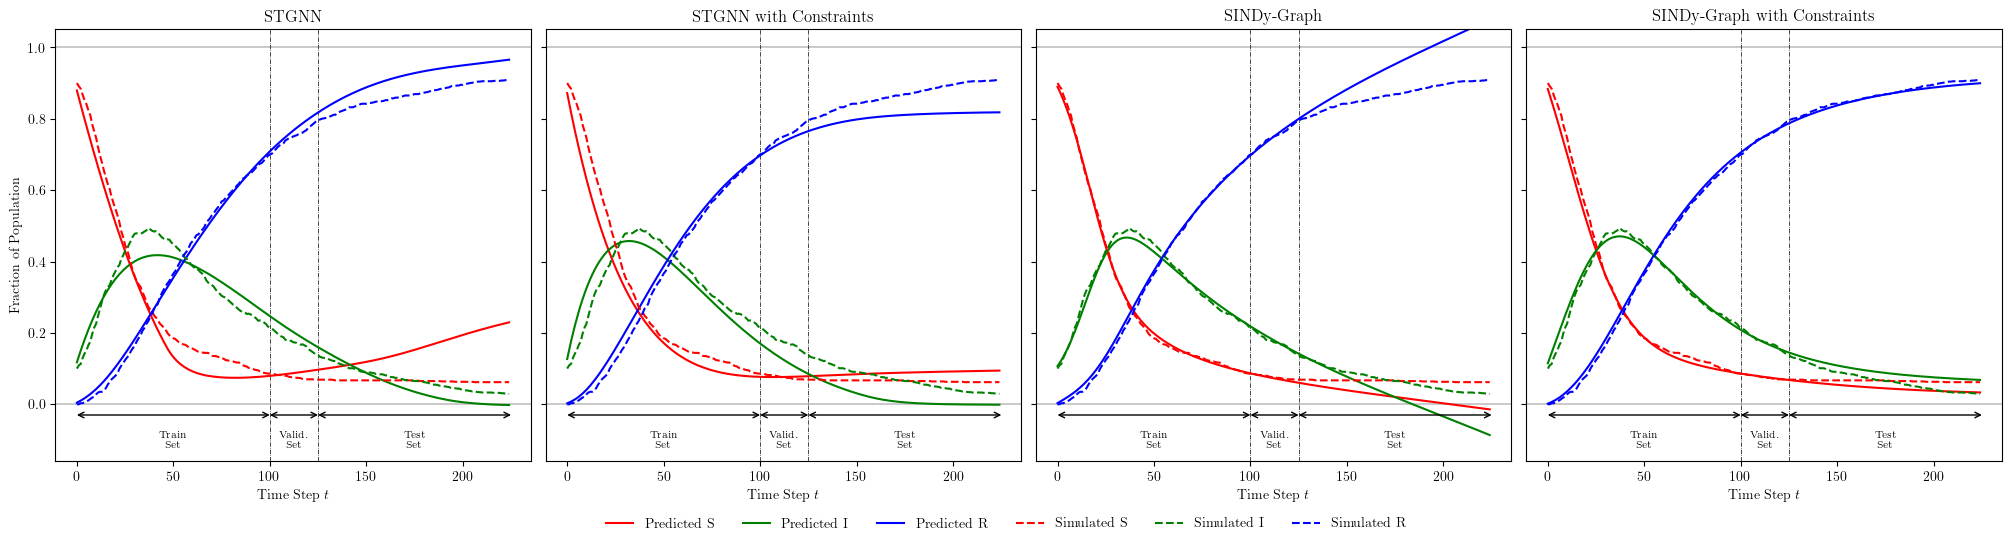

In [33]:
# Make a figure with 4 columns and 1 row, with sharedy
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 5), layout="constrained")
# Plot the data
for i, (data, title) in enumerate(zip([STGNN, STGNN_constrained, SINDY, SINDY_constrained], ['STGNN', 'STGNN with Constraints', 'SINDy-Graph', 'SINDy-Graph with Constraints'])):
    axs[i].plot(data[0], 'r')
    axs[i].plot(data[1], 'g')
    axs[i].plot(data[2], 'b')
    axs[i].plot(Simulated_SIR[0], 'r--')
    axs[i].plot(Simulated_SIR[1], 'g--')
    axs[i].plot(Simulated_SIR[2], 'b--')
    axs[i].set_title(title)
    axs[i].set_xlabel('Time')
    if i == 0: axs[i].set_ylabel('Fraction of Population')
    axs[i].set_xlabel('Time Step $t$')
    # Annotate the Train set, the points from 0 to train_points, with a <-> arrow and train set label
    axs[i].annotate('', xy=(0.0, -0.03), xytext=(100, -0.03), arrowprops=dict(arrowstyle="<->", color='black', shrinkA=0, shrinkB=0))
    axs[i].text(params["train_points"]-params["train_points"]/2, -0.1, 'Train\nSet', ha='center', va='center', color='black', fontsize='x-small', bbox=dict(boxstyle="round", fc="white", ec="white", pad=0.1))

    axs[i].annotate('', xy=(100, -0.03), xytext=(125, -0.03), arrowprops=dict(arrowstyle="<->", color='black', shrinkA=0, shrinkB=0))
    axs[i].text(112.5, -0.1, 'Valid.\nSet', ha='center', va='center', color='black', fontsize='x-small', bbox=dict(boxstyle="round", fc="white", ec="white", pad=0.1))

    axs[i].annotate('', xy=(125, -0.03), xytext=(225, -0.03), arrowprops=dict(arrowstyle="<->", color='black', shrinkA=0, shrinkB=0))
    axs[i].text(175, -0.1, 'Test\nSet', ha='center', va='center', color='black', fontsize='x-small', bbox=dict(boxstyle="round", fc="white", ec="white", pad=0.1))
    axs[i].axvline(x = params["train_points"], color = 'black', lw=0.5, ls='-.', zorder=0)
    axs[i].axvline(x = params["valid_points"], color = 'black', lw=0.5, ls='-.', zorder=0)
    axs[i].axhline(y = 0.0, color = 'black', linewidth=.3, zorder=0)
    axs[i].axhline(y = 1.0, color = 'black', linewidth=.3, zorder=0)
    axs[i].set_ylim([-0.16, 1.05])

plt.figlegend(['Predicted S', 'Predicted I', 'Predicted R', 'Simulated S', 'Simulated I', 'Simulated R'], loc='lower center', ncol=6, labelspacing=0., frameon=False, bbox_to_anchor=(0.5, -0.075))
# Save the figure
plt.savefig(DIR / 'dyn_evolution_v2.png', dpi=300, bbox_inches='tight')